# *American Sign Language Recognition Using CNN*
Communication is an important part of our lives. Deaf and dumb people being unable to speak and listen, experience a lot of problems while communicating with normal people. There are many ways by which people with these disabilities try to communicate. One of the most prominent ways is the use of sign language, i.e. hand gestures. It is necessary to develop an application for recognizing gestures and actions of sign language so that deaf and dumb people can communicate easily with even those who don’t understand sign language. The objective of this work is to take an elementary step in breaking the barrier in communication between the normal people and deaf and dumb people with the help of sign language.

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well

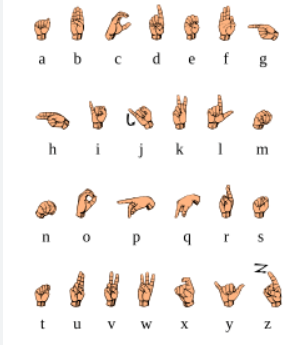

# *Importing Important Packages*

In [38]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [7]:
!pip install tensorflow


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# *Loading and Preprocessing the dataset*
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST handwritten digit dataset but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [9]:
train_df=pd.read_csv('sign_mnist_train.csv')
test_df=pd.read_csv('sign_mnist_test.csv')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [12]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [13]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


The train_df dataset consit of 1st column representing labels 1 to 24. The label is loaded in a seperate dataframe called 'train_label' and the 'label' column is dropped from the original training dataframe which now consist of only 784 pixel values for each image.

In [14]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Converting the dataframe to numpy array type to be used while training the CNN. The array is converted from 1-D to 3-D which is the required input to the first layer of the CNN. Similar preprocessing is done to the test dataframe.

In [15]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [16]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


# *Converting the integer labels to binary form*

The label dataframe consist of single values from 1 to 24 for each individual picture. The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier. Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0]. The LabelBinarizer package from sklearn.preprocessing is used for that. The document link is https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [17]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [18]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [19]:
X_test=X_test.values.reshape(-1,28,28,1)

In [20]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


# *Augmenting the image dataset to generate new data*

ImageDataGenerator package from keras.preprocessing.image allows to add different distortions to image dataset by providing random rotation, zoom in/out , height or width scaling etc to images pixel by pixel.

Here is the package details https://keras.io/preprocessing/image/

The image dataset in also normalised here using the rescale parameter which divides each pixel by 255 such that the pixel values range between 0 to 1.

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

# *Visualization of the Dataset*


Preview of the images in the training dataset



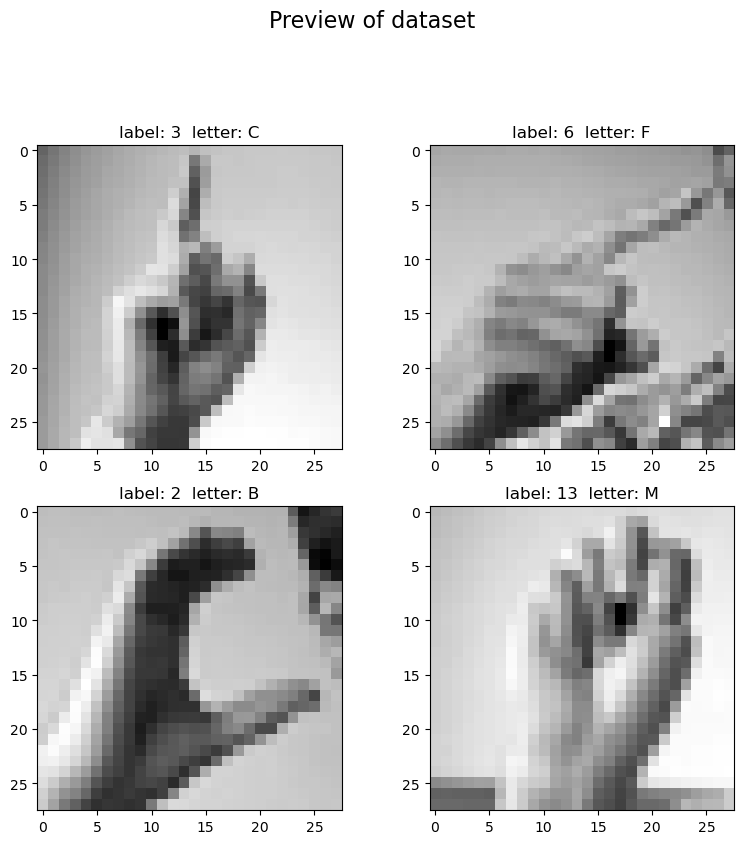

In [33]:
import matplotlib.pyplot as plt

fig, axe = plt.subplots(2, 2, figsize=(8, 8))  # Adjust figsize for better layout
fig.suptitle('Preview of dataset', fontsize=16, y=1.05)  # Push title up a bit

axe[0, 0].imshow(X_train[0].reshape(28, 28), cmap='gray')
axe[0, 0].set_title('label: 3  letter: C')

axe[0, 1].imshow(X_train[1].reshape(28, 28), cmap='gray')
axe[0, 1].set_title('label: 6  letter: F')

axe[1, 0].imshow(X_train[2].reshape(28, 28), cmap='gray')
axe[1, 0].set_title('label: 2  letter: B')

axe[1, 1].imshow(X_train[4].reshape(28, 28), cmap='gray')
axe[1, 1].set_title('label: 13  letter: M')

plt.tight_layout()  # Adjust layout to prevent overlaps
plt.subplots_adjust(top=0.88)  # Give space for suptitle
plt.show()


Frequency plot of the labels

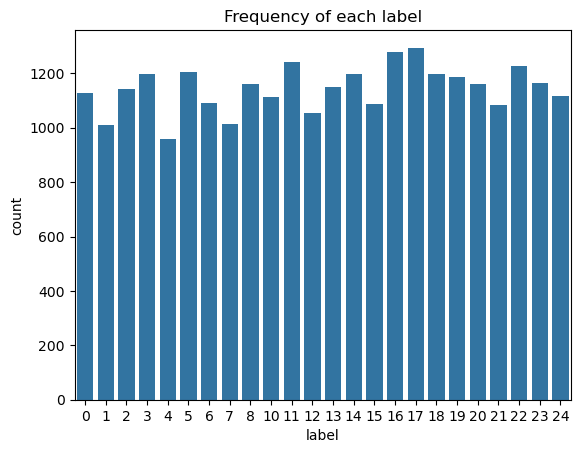

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train_label)
plt.title("Frequency of each label")
plt.show()


# *Building the CNN Model*

The model consist of :

Three convolution layer each followed bt MaxPooling for better feature capture
A dense layer of 512 units
The output layer with 24 units for 24 different classes
Convolution layers

Conv layer 1 -- UNITS - 128 KERNEL SIZE - 5 * 5 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 2 -- UNITS - 64 KERNEL SIZE - 3 * 3 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 3 -- UNITS - 32 KERNEL SIZE - 2 * 2 STRIDE LENGTH - 1 ACTIVATION - ReLu

MaxPool layer 1 -- MAX POOL WINDOW - 3 * 3 STRIDE - 2

MaxPool layer 2 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

MaxPool layer 3 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

In [24]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [25]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# *Training the model*

In [27]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 59s 410ms/step - loss: 2.9918 - accuracy: 0.1063 - val_loss: 2.3207 - val_accuracy: 0.2968
Epoch 2/35
138/138 [==============================] - 57s 414ms/step - loss: 2.2639 - accuracy: 0.2862 - val_loss: 1.5893 - val_accuracy: 0.4815
Epoch 3/35
138/138 [==============================] - 61s 441ms/step - loss: 1.7019 - accuracy: 0.4467 - val_loss: 1.0484 - val_accuracy: 0.6811
Epoch 4/35
138/138 [==============================] - 57s 409ms/step - loss: 1.2961 - accuracy: 0.5686 - val_loss: 0.8163 - val_accuracy: 0.7174
Epoch 5/35
138/138 [==============================] - 57s 409ms/step - loss: 1.0439 - accuracy: 0.6521 - val_loss: 0.6710 - val_accuracy: 0.7719
Epoch 6/35
138/138 [==============================] - 56s 408ms/step - loss: 0.8710 - accuracy: 0.7061 - val_loss: 0.6093 - val_accuracy: 0.7720
Epoch 7/35
138/138 [==============================] - 57s 413ms/step - loss: 0.7485 - accuracy: 0.7476 - val_loss: 0.3758 - val_ac

# *Evaluating the model*

In [28]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 6s 25ms/step - loss: 0.0436 - accuracy: 0.9877


In [29]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 98.7730085849762%


In [34]:
loss, accuracy = model.evaluate(x=X_test, y=y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

225/225 [==============================] - 7s 31ms/step - loss: 0.0436 - accuracy: 0.9877
Test Accuracy: 98.77%


In [35]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

In [36]:
history = model.fit(
    train_generator,
    validation_data=(X_test, y_test),
    epochs=5
)

Epoch 1/5
858/858 [==============================] - 85s 99ms/step - loss: 0.4184 - accuracy: 0.8616 - val_loss: 0.0923 - val_accuracy: 0.9668
Epoch 2/5
858/858 [==============================] - 69s 80ms/step - loss: 0.2694 - accuracy: 0.9090 - val_loss: 0.0559 - val_accuracy: 0.9844
Epoch 3/5
858/858 [==============================] - 45s 52ms/step - loss: 0.2433 - accuracy: 0.9178 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 4/5
858/858 [==============================] - 42s 49ms/step - loss: 0.2307 - accuracy: 0.9218 - val_loss: 0.0348 - val_accuracy: 0.9908
Epoch 5/5
858/858 [==============================] - 48s 56ms/step - loss: 0.2069 - accuracy: 0.9301 - val_loss: 0.0418 - val_accuracy: 0.9849


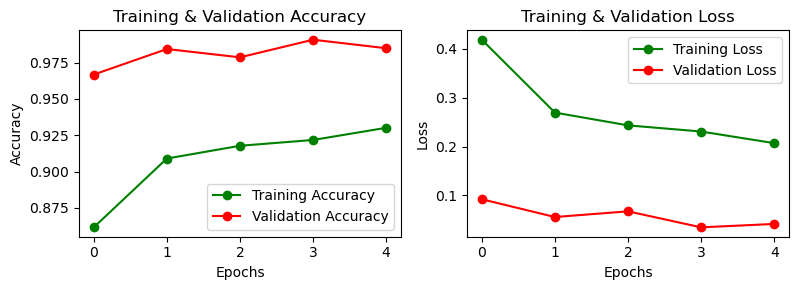

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'go-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'go-', label='Training Loss')
plt.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()